In [ ]:
### -------------------------- 生信分析基础 ------------------------------ ###
## contact: fuxin@singleronbio.com
## 轨迹分析：monocle2

In [2]:
library(tidyverse)
library(Seurat)
library(monocle)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapply

In [1]:
res_dir = "/SGRNJ03/randd/user/fuxin/PROJECTS/Bioinfo_Train"
sample = "PYF"
rds_file = paste0(res_dir,"/results/",sample,".rds")
rds = readRDS(rds_file)

In [3]:
rds_dev = subset(rds, `RNA_snn_res.0.6` %in% c('10','5'))

In [4]:
# Extract data, phenotype data, and feature data from the SeuratObject
data <- as(as.matrix(rds_dev@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = rds_dev@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
HSMM <- newCellDataSet(data,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())

In [5]:
## normalization
HSMM <- estimateSizeFactors(HSMM)
HSMM <- estimateDispersions(HSMM)
#Filtering low-quality cells
HSMM <- detectGenes(HSMM, min_expr = 3 )

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Removing 24 outliers



In [6]:
expressed_genes <- row.names(subset(fData(HSMM),num_cells_expressed >= 10))

In [7]:
#Clustering cells without marker genes 
disp_table <- dispersionTable(HSMM)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
HSMM <- setOrderingFilter(HSMM, unsup_clustering_genes$gene_id)

In [8]:
HSMM <- reduceDimension(HSMM, max_components = 2, num_dim = 10,
                         reduction_method = 'tSNE', verbose = T)

Remove noise by PCA ...

Reduce dimension by tSNE ...



Distance cutoff calculated to 3.30917 


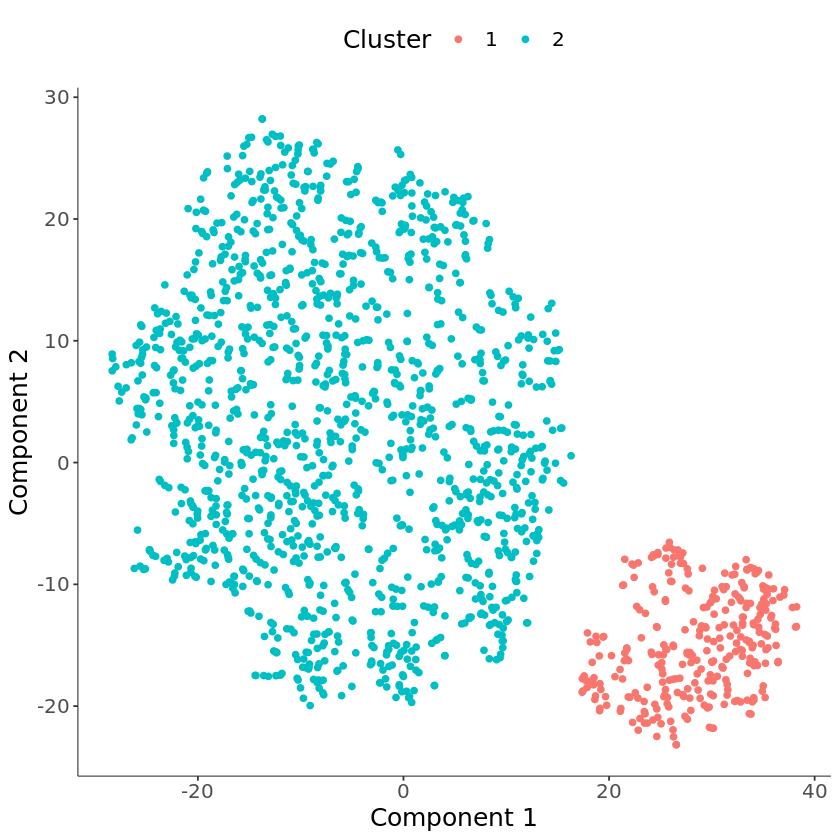

In [9]:
HSMM <- clusterCells(HSMM, num_clusters = 3) 
plot_cell_clusters(HSMM) #optional

In [10]:
#Step 1: choosing genes that define progress
diff_test_res <- differentialGeneTest(HSMM[expressed_genes,],
                                      fullModelFormulaStr = "~percent.mito")
ordering_genes <- row.names (subset(diff_test_res, qval < 0.01))
HSMM <- setOrderingFilter(HSMM, ordering_genes)

In [11]:
#Trajectory step 2: reduce data dimensionality  
HSMM <- reduceDimension(HSMM, max_components = 2,
                            method = 'DDRTree')

In [12]:
#Trajectory step 3: order cells along the trajectory  
HSMM <- orderCells(HSMM)

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”


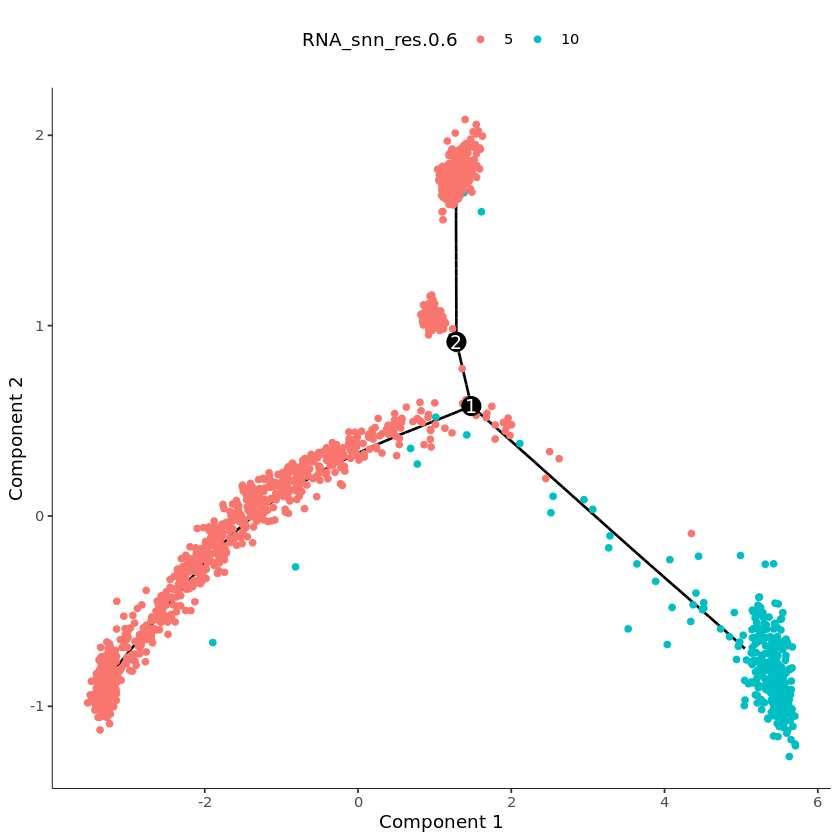

In [14]:
plot_cell_trajectory(HSMM, color_by = "RNA_snn_res.0.6")

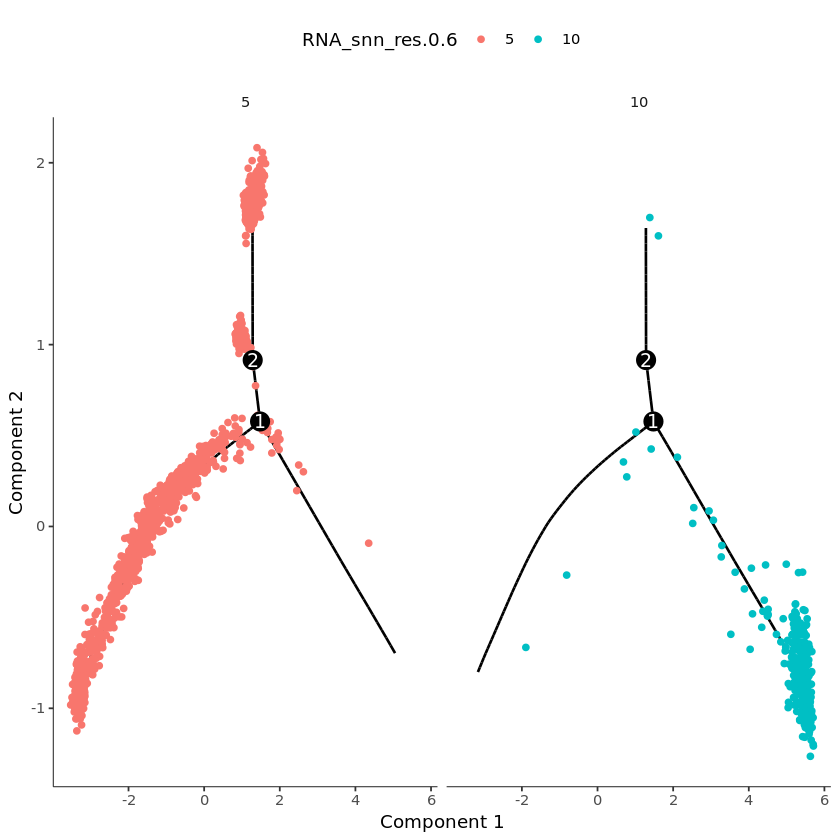

In [15]:
plot_cell_trajectory(HSMM, color_by = "RNA_snn_res.0.6") +
    facet_wrap(~`RNA_snn_res.0.6`, nrow = 1)

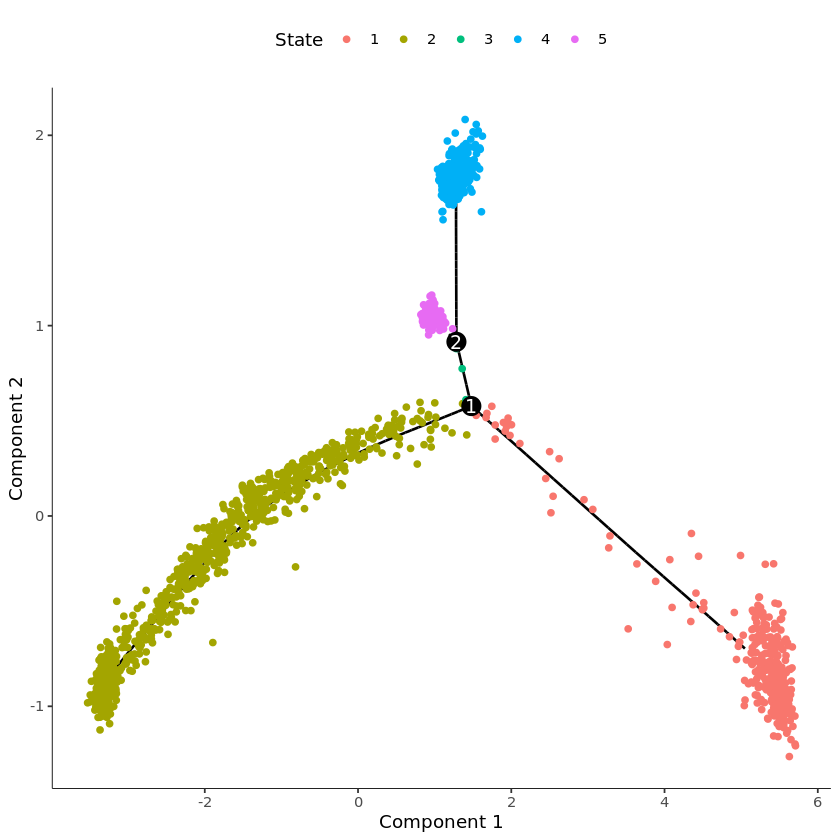

In [16]:
plot_cell_trajectory(HSMM, color_by = "State")

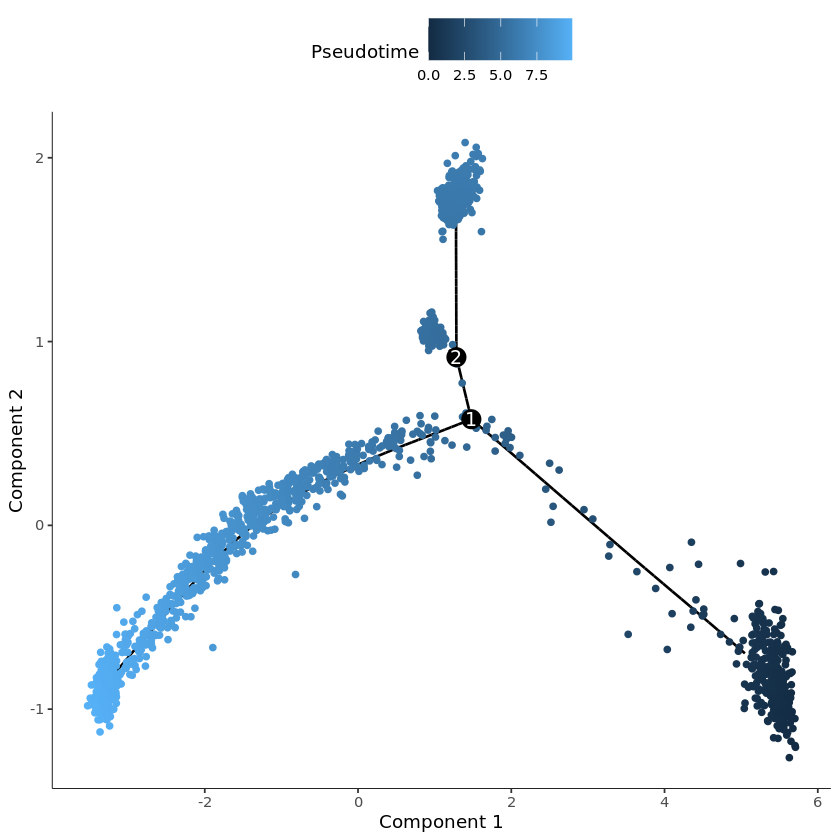

In [17]:
plot_cell_trajectory(HSMM, color_by = "Pseudotime")

In [23]:
markers_file_top5 = paste0(res_dir,"/results/",sample,".top5markers.tsv")
markers_top5 = readr::read_tsv(markers_file_top5)

Rows: 95 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [24]:
head(markers_top5)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.000000e+00,2.065087,0.558,0.226,0.000000e+00,0,Hcar2
0.000000e+00,1.996256,0.743,0.317,0.000000e+00,0,Acod1
0.000000e+00,1.912389,0.570,0.211,0.000000e+00,0,Hdc
0.000000e+00,1.878523,0.989,0.889,0.000000e+00,0,Cxcl2
2.897607e-292,1.970722,0.443,0.164,4.861026e-292,0,G0s2
6.981112e-189,1.141519,0.973,0.956,1.171151e-184,1,Gm42418


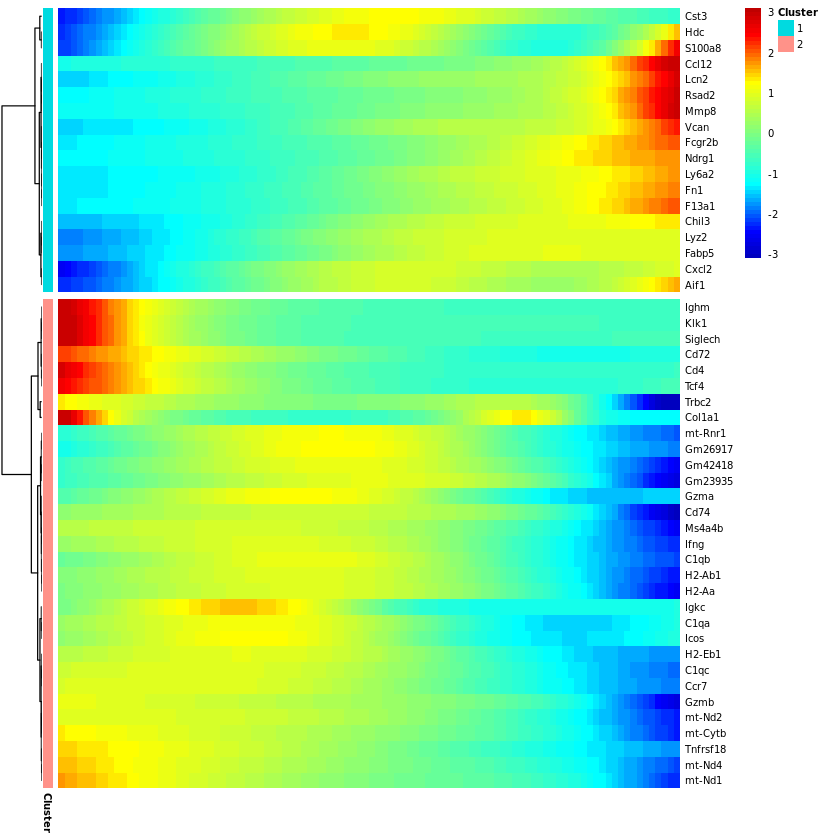

In [25]:
# Count genes that follow similar kinetic trends
diff_test_res <- differentialGeneTest(HSMM[unique(markers_top5$gene),],
                                      fullModelFormulaStr = "~sm.ns(Pseudotime)")
sig_gene_names <- row.names(subset(diff_test_res, qval < 0.1))
plot_pseudotime_heatmap(HSMM[sig_gene_names,],
                        num_clusters = 2,
                        cores = 1,
                        show_rownames = T)

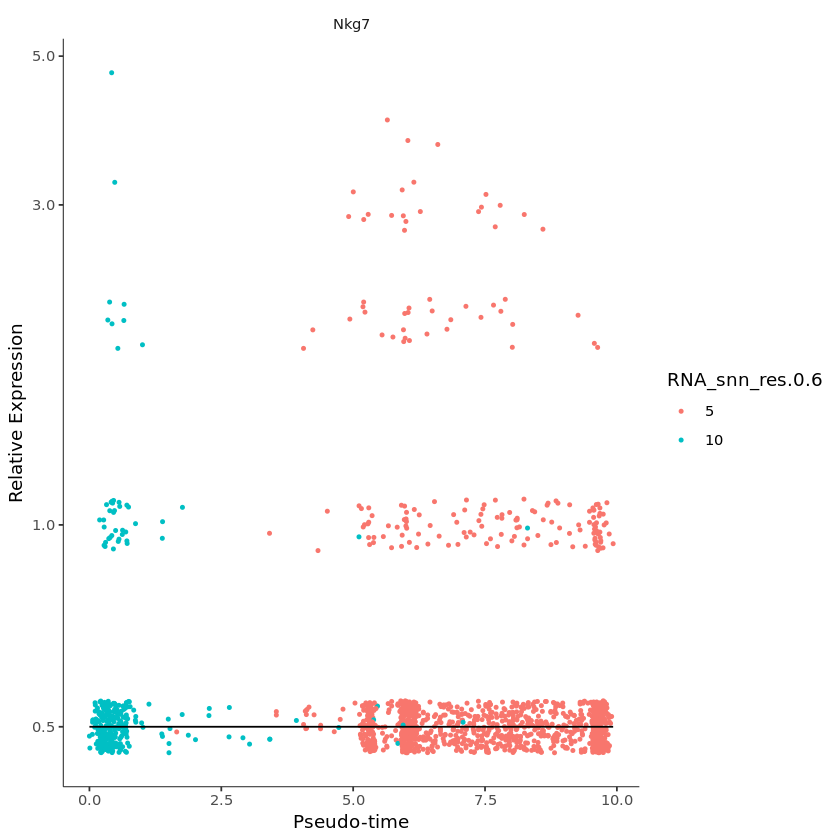

In [26]:
#单个基因的时间变化
HSMM_expressed_genes <-  row.names(subset(fData(HSMM),
                                          num_cells_expressed >= 10))
HSMM_filtered <- HSMM[HSMM_expressed_genes,]
my_genes <- row.names(subset(fData(HSMM_filtered),
                             gene_short_name %in% c("Cd2", "Cd3d", "Nkg7")))
cds_subset <- HSMM_filtered[my_genes,]
plot_genes_in_pseudotime(cds_subset, color_by = "RNA_snn_res.0.6")